# Final Project
## By: Kayla Wesoly
## December 20, 2018
# Default of Credit Card Clients
## Introduction

In [1]:
library(caret)
library(ranger)
library(readr)
library(ggplot2)

Loading required package: lattice
Loading required package: ggplot2


## Bringing in the Data

In [2]:
setwd("C:/Users/student/Desktop/Fall 2018/R Class/Datasets")
cr = read.csv("CreditCard.csv")

cr$default.payment.next.month = factor(cr$default.payment.next.month)
cr$SEX = factor(cr$SEX)
cr$EDUCATION = factor(cr$EDUCATION)
cr$MARRIAGE = factor(cr$MARRIAGE)

## Exploration and Visualization

### Graphing with 1 Variable

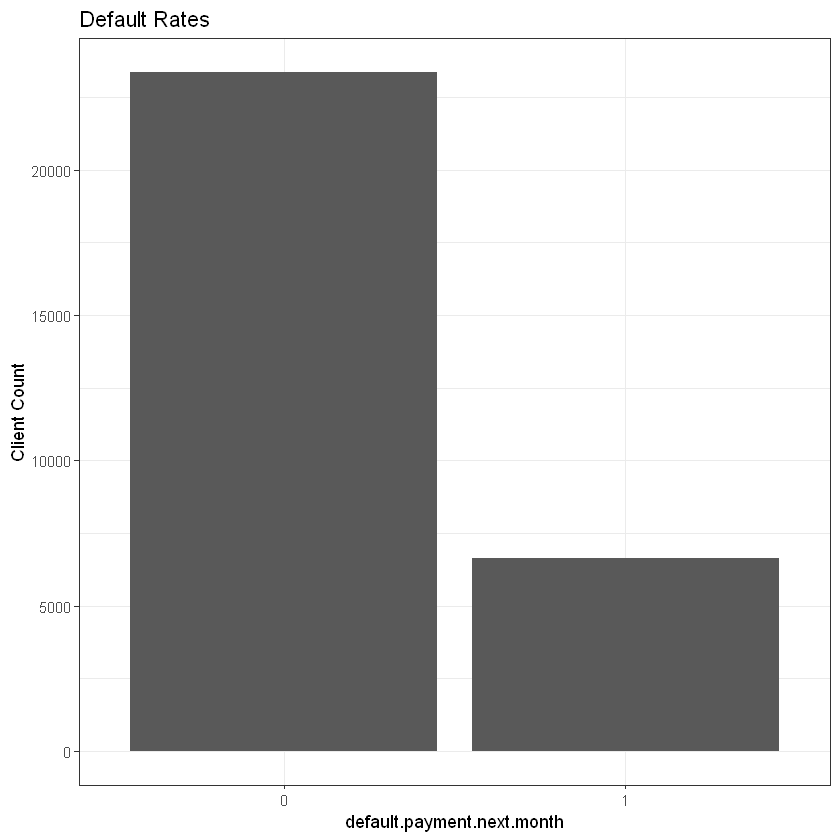

In [3]:
ggplot(cr, aes(x = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Default Rates")

In [4]:
prop.table(table(cr$default.payment.next.month))


     0      1 
0.7788 0.2212 

### Graphing with 2 Variables

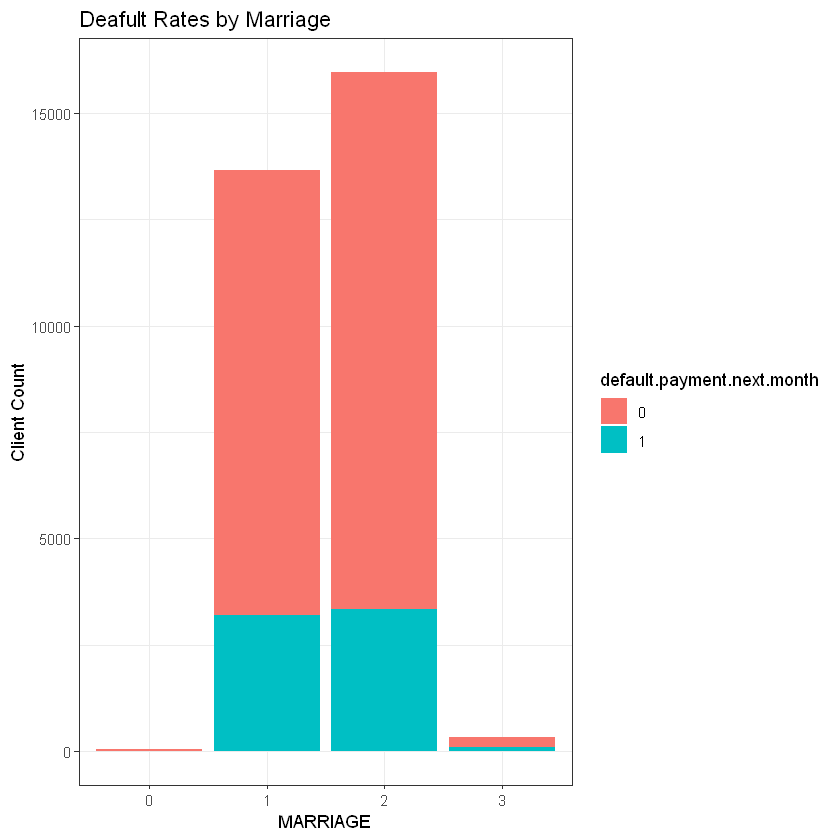

In [5]:
ggplot(cr, aes(x = MARRIAGE, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by Marriage")

### Graphing with 3 Variables

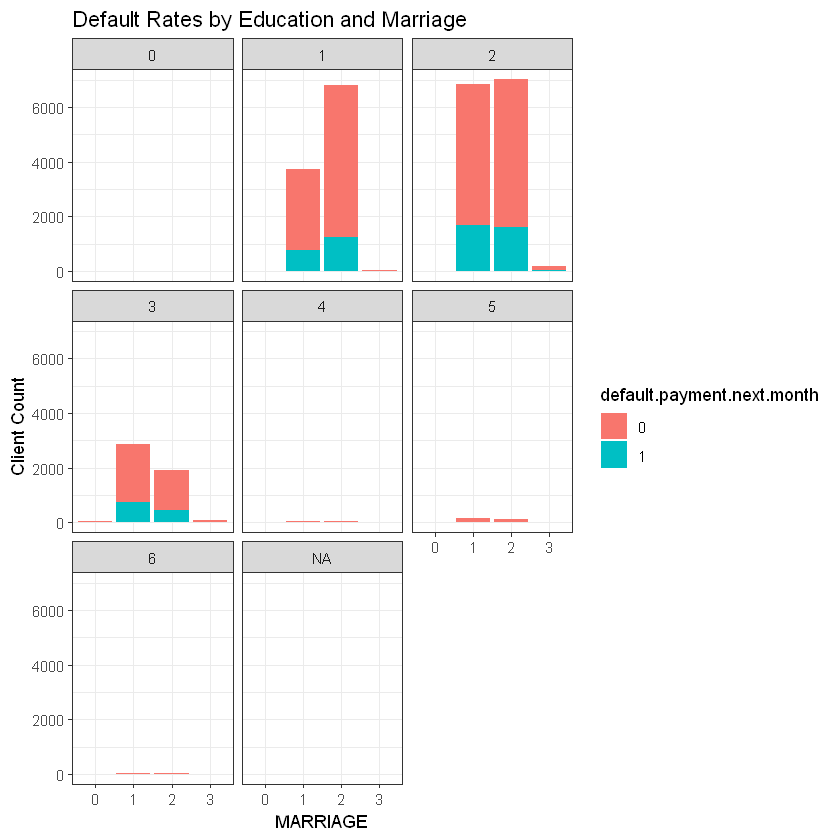

In [6]:
ggplot(cr, aes(x = MARRIAGE, fill = default.payment.next.month)) + theme_bw() + facet_wrap(~ EDUCATION) + geom_bar() + labs(y = "Client Count", title = "Default Rates by Education and Marriage")

### Box and Whisker Plot (4)

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."

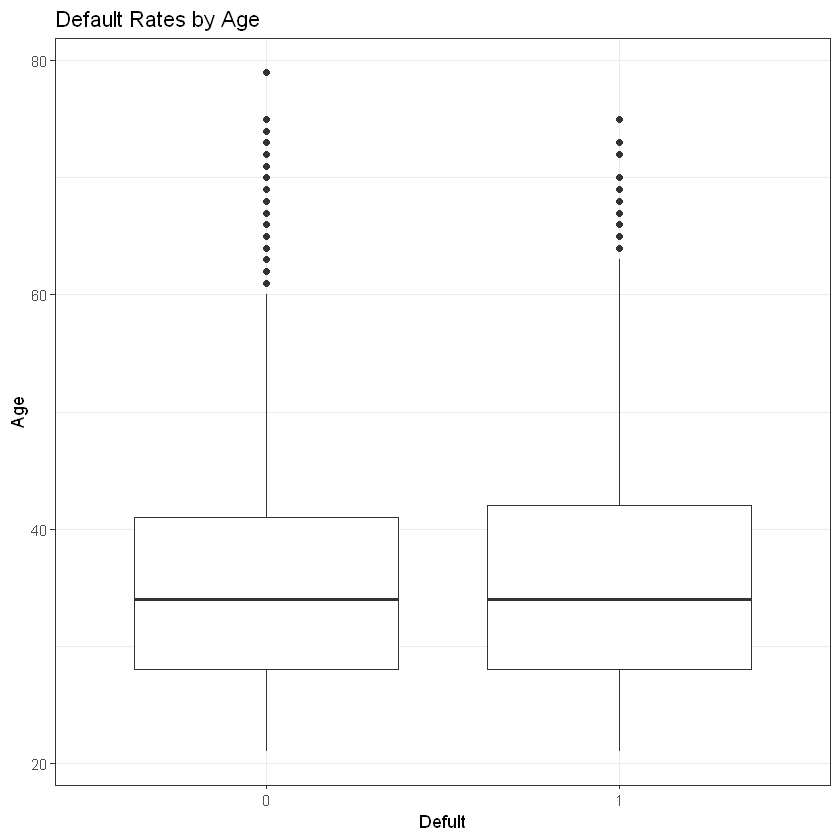

In [7]:
ggplot(cr, aes(x = default.payment.next.month, y = AGE)) + theme_bw() + geom_boxplot() + labs(y = "Age", x = "Defult", title = "Default Rates by Age")

### Age Distribution (5)

Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

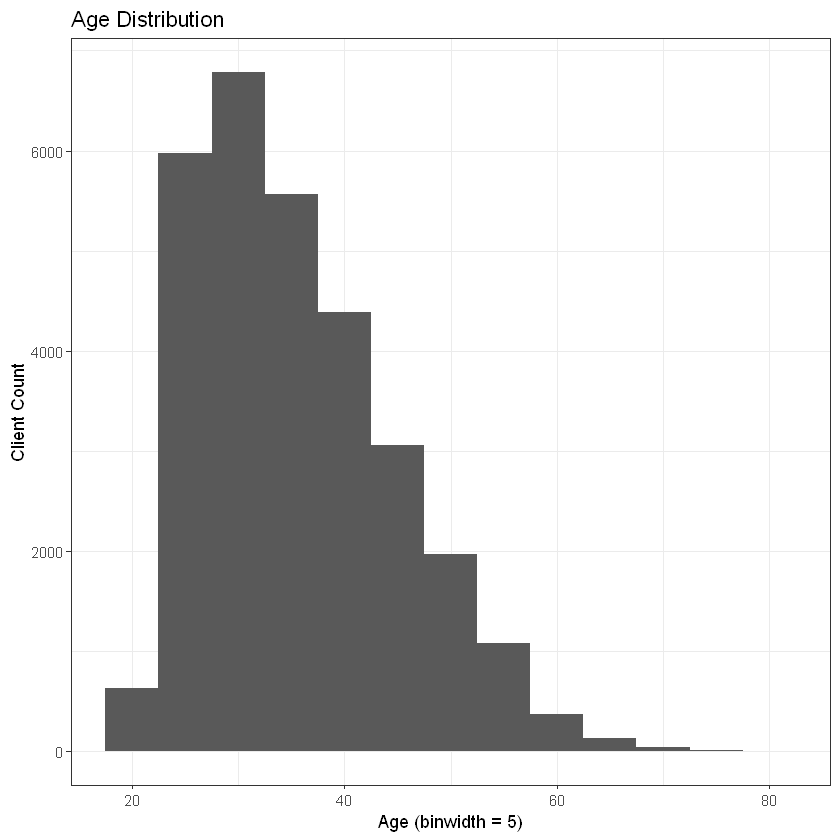

In [8]:
ggplot(cr, aes(x = AGE)) + theme_bw() + geom_histogram(binwidth = 5) + labs(y = "Client Count", x = "Age (binwidth = 5)", title = "Age Distribution")

### Default Rate by Age (6)

Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

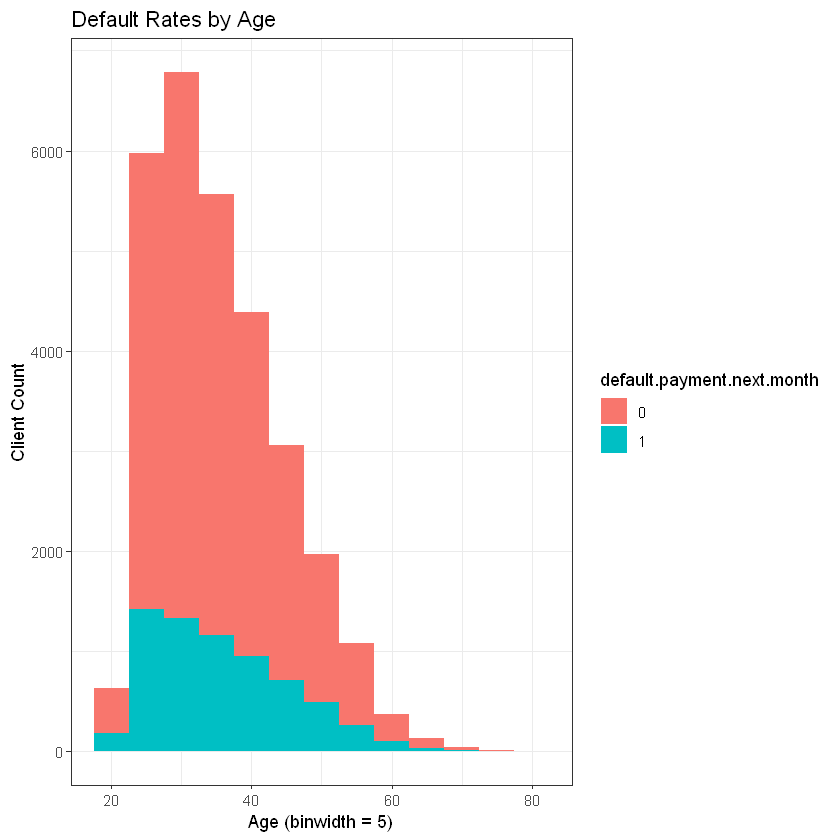

In [9]:
ggplot(cr, aes(x = AGE, fill = default.payment.next.month)) + theme_bw() + geom_histogram(binwidth = 5) + labs(y = "Client Count", x = "Age (binwidth = 5)", title = "Default Rates by Age")

### Default Rate by Education (7)

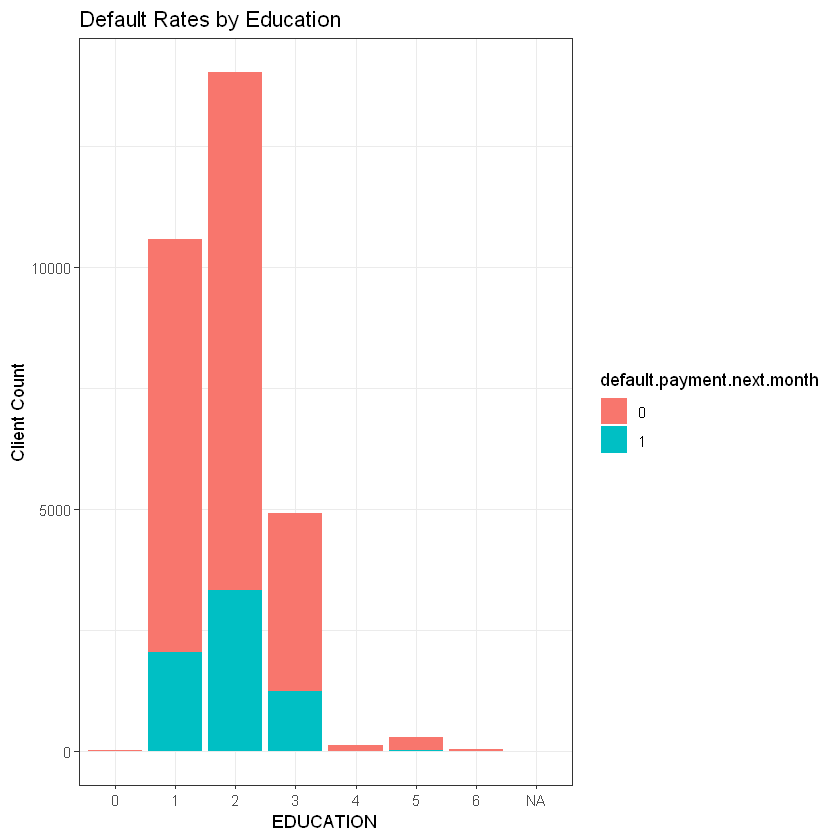

In [10]:
ggplot(cr, aes(x = EDUCATION, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Default Rates by Education")

### Default Rates by Sex (8)

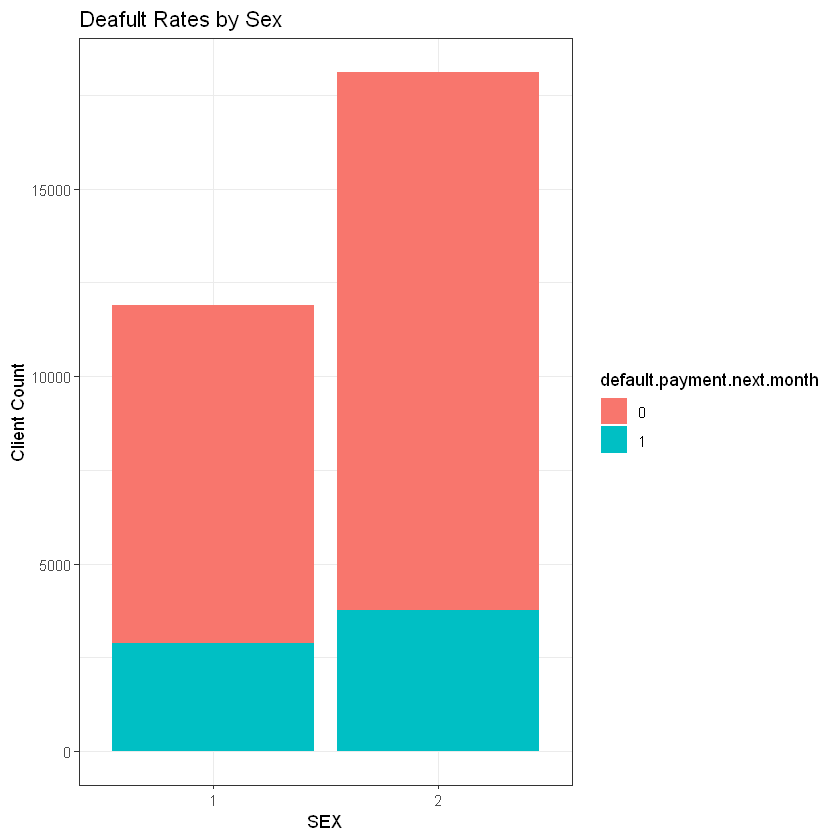

In [11]:
ggplot(cr, aes(x = SEX, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by Sex")

### Defualt Rates by Education and Sex

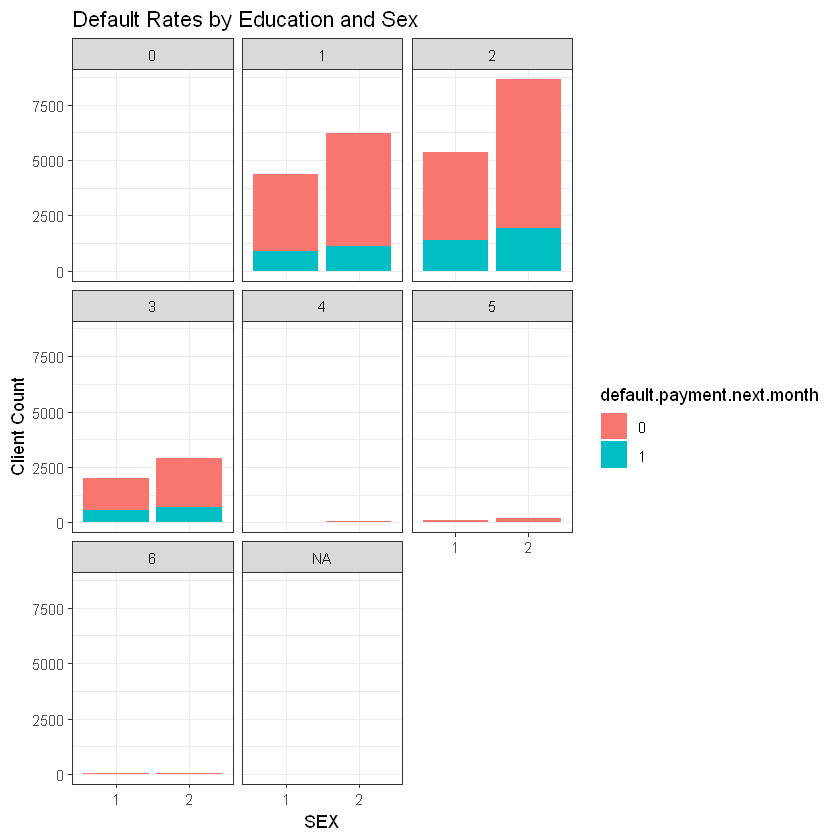

In [12]:
ggplot(cr, aes(x = SEX, fill = default.payment.next.month)) + theme_bw() + facet_wrap(~ EDUCATION) + geom_bar() + labs(y = "Client Count", title = "Default Rates by Education and Sex")

### Defualt Rates by Age (10)

Warning message:
"Removed 3 rows containing non-finite values (stat_count)."

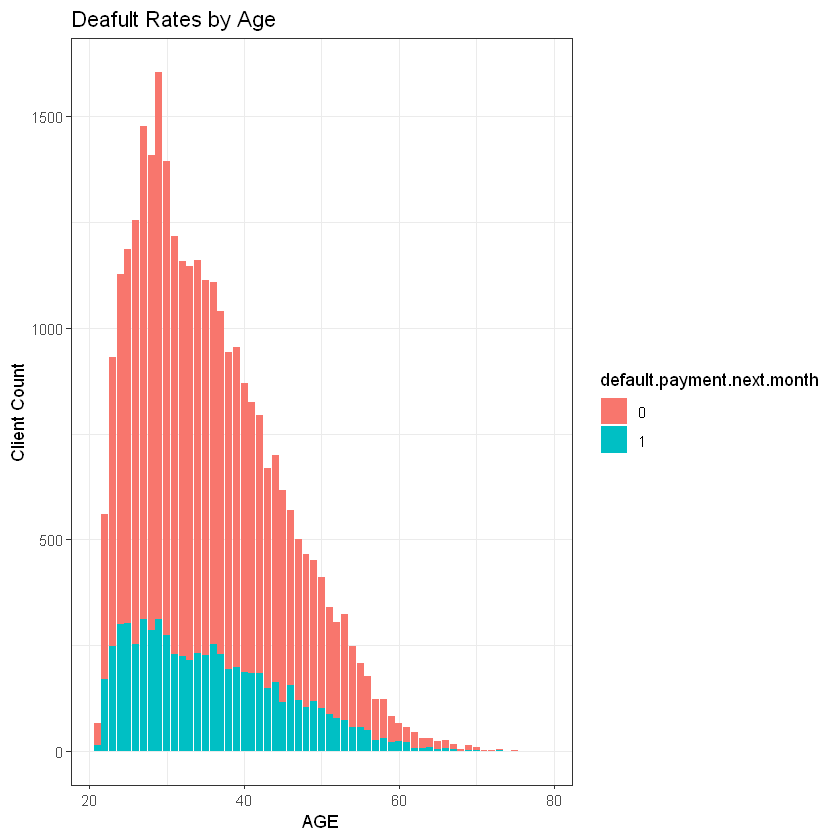

In [13]:
ggplot(cr, aes(x = AGE, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by Age")

### Graph (11)

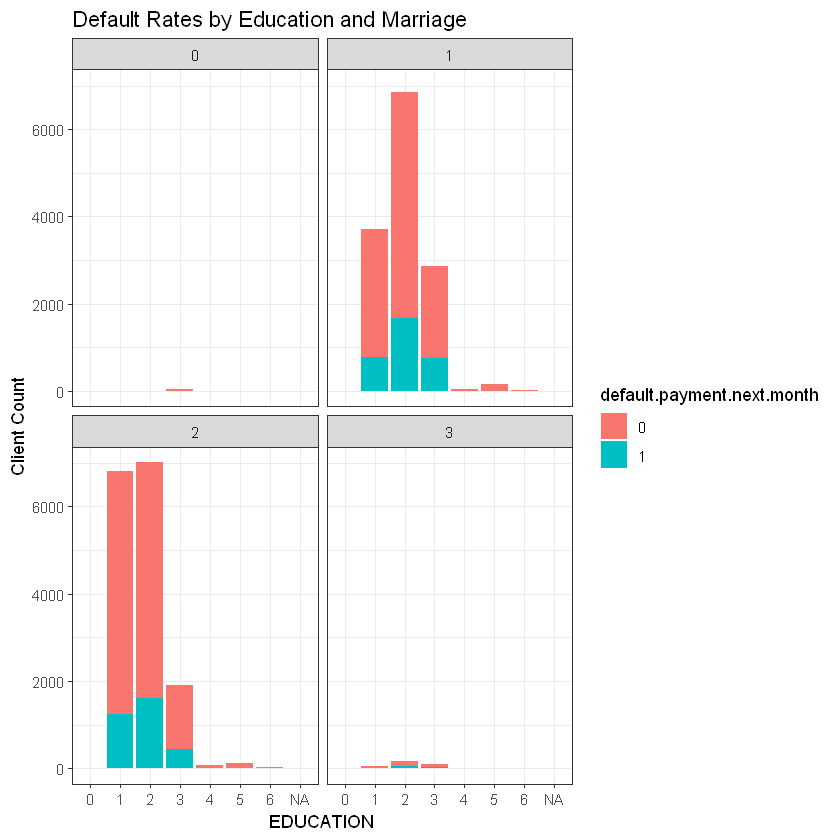

In [14]:
ggplot(cr, aes(x = EDUCATION, fill = default.payment.next.month)) + theme_bw() + facet_wrap(~ MARRIAGE) + geom_bar() + labs(y = "Client Count", title = "Default Rates by Education and Marriage")

### Graph (12)

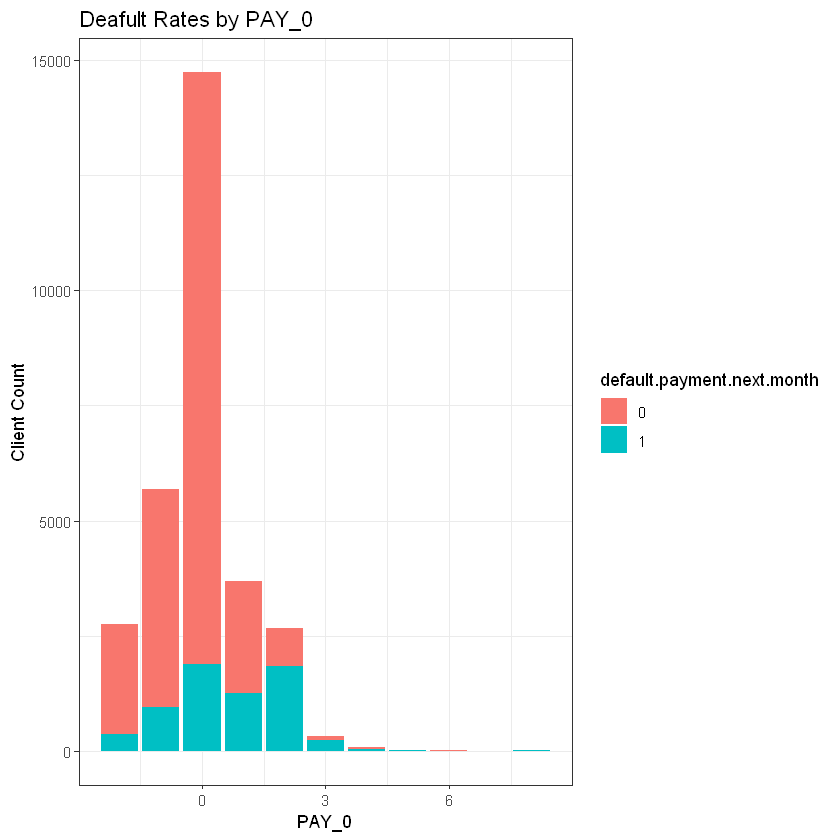

In [15]:
ggplot(cr, aes(x = PAY_0, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by PAY_0")

### Graph (13)

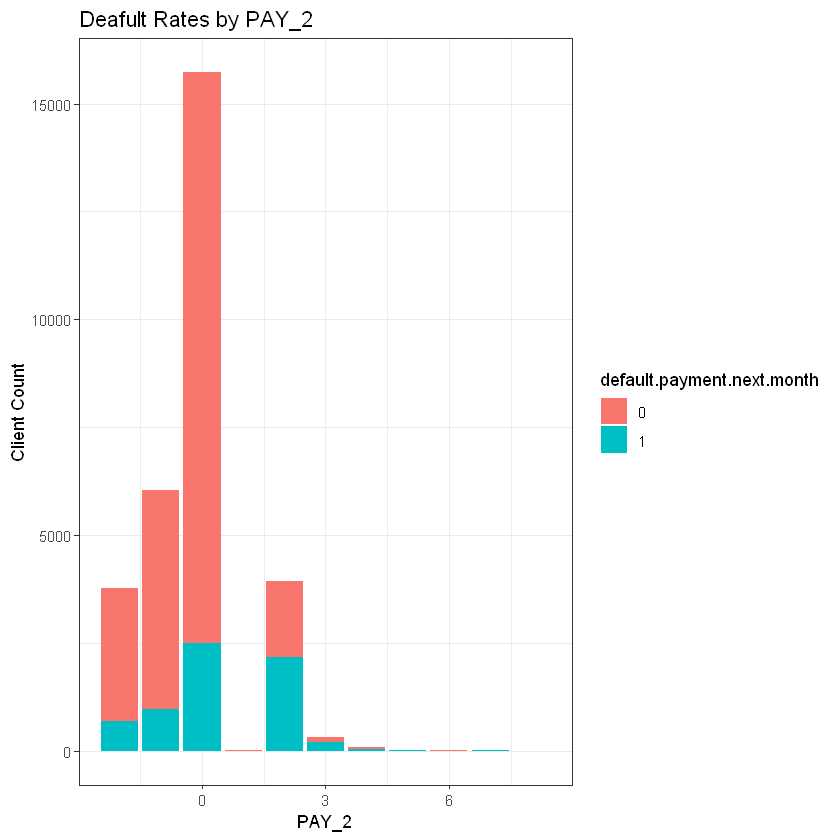

In [16]:
ggplot(cr, aes(x = PAY_2, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by PAY_2")

### Graph (14)

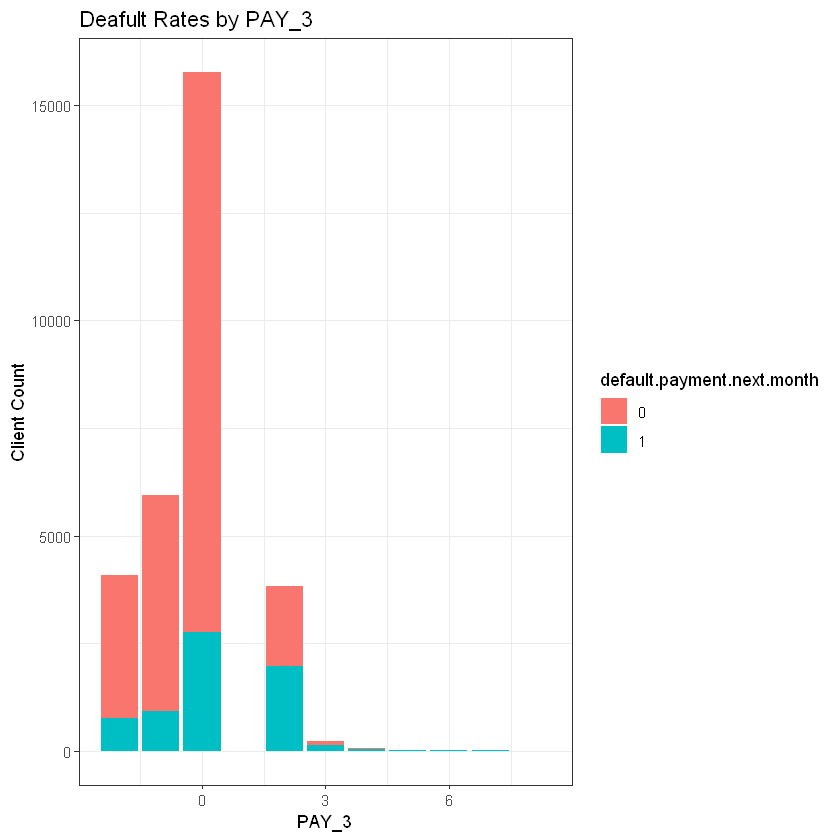

In [17]:
ggplot(cr, aes(x = PAY_3, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by PAY_3")

### Graph (15)

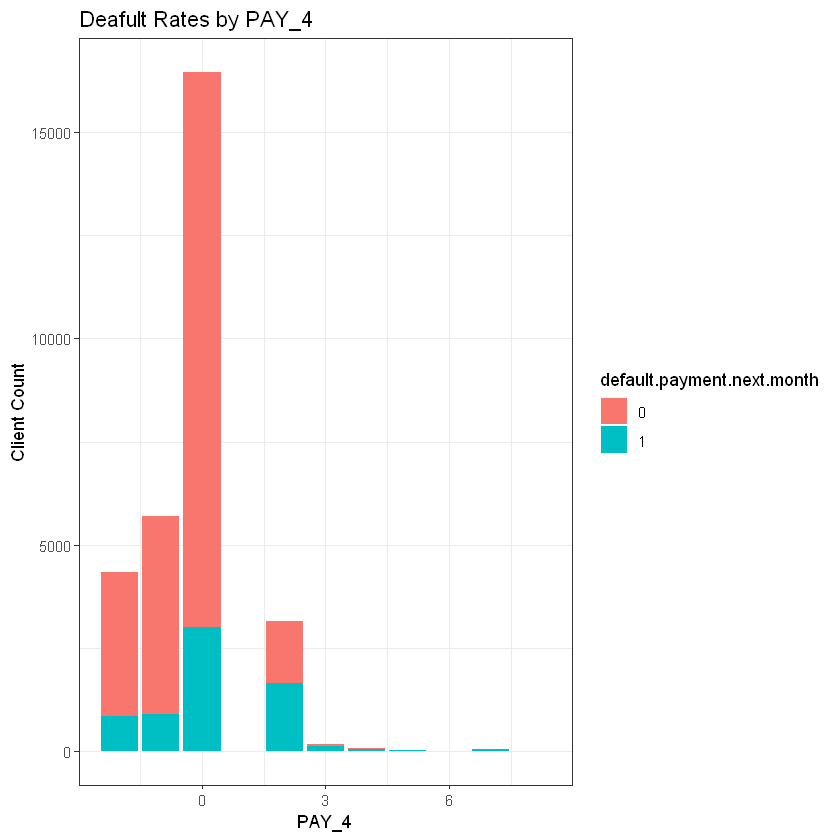

In [18]:
ggplot(cr, aes(x = PAY_4, fill = default.payment.next.month)) + theme_bw() + geom_bar() + labs(y = "Client Count", title = "Deafult Rates by PAY_4")

## Missing Values

In [19]:
sum(is.na(cr))

# Using my quick clean function (1)
library(kwes1)
cr1 = quick_clean(cr,1)
sum(is.na(cr1))

# Using complete cases (2)
sum(is.na(cr))

cr2 = cr[complete.cases(cr),]
sum(is.na(cr2))

# (3)
sum(is.na(cr))

for(i in 1:ncol(cr)) 
    {
    cr[cr ==" "]= NA  
    missval <- sum(is.na(cr[i]))
    if(missval > 0)
      {
      if(is.numeric(cr[[i]]) == FALSE) 
        {
        levels=unique(cr[,i])
        cr[,i][is.na(cr[,i])]=levels[which.max(tabulate(match(cr[,i], x = levels)))]
      }
      else
      {
        cr3 <- preProcess(cr, method='medianImpute')
      }
    }
}
sum(is.na(cr3))



[1] 4

[1] 0

[1] 4

[1] 0

[1] 4

[1] 0

## Encoding/Recoding Categorical Variables

In [20]:
levels(cr$EDUCATION) = c("g", "o", "o", "o", "o", "o", "o")
levels(cr$MARRIAGE) = c("m", "s", "s", "s")


dummies_model <- dummyVars(default.payment.next.month ~ ., data=cr1)
trainData_mat <- predict(dummies_model, newdata = cr1)
## Warning in model.frame.default(Terms, newdata, na.action = na.action, xlev
## = object$lvls): variable 'default.payment.next.month' is not a factor
cr4 <- data.frame(trainData_mat)
cr4$default.payment.next.month <- cr1$default.payment.next.month

# Renaming Male/Female levels for SEX variable
levels(cr1$SEX)[levels(cr1$SEX) == "1"]             <- "Male"
levels(cr1$SEX)[levels(cr1$SEX) == "2"]             <- "Female"
str(cr1$SEX)
##  Factor w/ 2 levels "Male","Female": 2 2 2 2 1 1 1 2 2 1 ...
cr1SEX = as.numeric(cr1$SEX)


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'default.payment.next.month' is not a factor"

 Factor w/ 2 levels "Male","Female": 2 2 2 2 1 1 1 2 2 1 ...


## Model Training and Model Tuning

In [21]:
#Creating training and testing datatsets
names(cr)[25] = "target"
splitIndex <-createDataPartition(cr$target, p=.70, list = FALSE, times = 1)
train <-cr[splitIndex,]
test <- cr[-splitIndex,]

#Creating an undersampled dataset
train1 = train[train$target == "1",]
train0 = train[train$target == '0',]
n0 = nrow(train0)
n1 = nrow(train1)
train00 = train0[sample(1:n0,n1),]
train_under = rbind(train00, train1)

# Random Forest 1
library(randomForest)

set.seed(215)
fit <- randomForest(as.factor(default.payment.next.month) ~ SEX + AGE + EDUCATION + PAY_0 + PAY_2 +
                                            MARRIAGE,
                      data=cr1, 
                      importance=TRUE, 
                      ntree=2000)

# Glm Model
Gridglm = expand.grid(alpha = 0:1, lambda = seq(0.0001, 0.1, length = 10))
Control = trainControl(method = "cv", number = 7)
glmdefa = train(default.payment.next.month~., cr1, method = "glmnet")
glmtuneda = train(default.payment.next.month~., cr1, method ="glmnet",tuneGrid = Gridglm, trControl = Control)
max(glmtuneda$results$Accuracy) > max(glmdefa$results$Accuracy)
max(glmtuneda$results$Accuracy)
max(glmdefa$results$Accuracy)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ranger':

    importance

The following object is masked from 'package:ggplot2':

    margin



[1] TRUE

[1] 0.8104664

[1] 0.809504

### Random Forest 2

+ Fold01: mtry=2, splitrule=gini, min.node.size=1 
- Fold01: mtry=2, splitrule=gini, min.node.size=1 
+ Fold01: mtry=2, splitrule=gini, min.node.size=2 
- Fold01: mtry=2, splitrule=gini, min.node.size=2 
+ Fold01: mtry=2, splitrule=gini, min.node.size=3 
- Fold01: mtry=2, splitrule=gini, min.node.size=3 
+ Fold02: mtry=2, splitrule=gini, min.node.size=1 
- Fold02: mtry=2, splitrule=gini, min.node.size=1 
+ Fold02: mtry=2, splitrule=gini, min.node.size=2 
- Fold02: mtry=2, splitrule=gini, min.node.size=2 
+ Fold02: mtry=2, splitrule=gini, min.node.size=3 
- Fold02: mtry=2, splitrule=gini, min.node.size=3 
+ Fold03: mtry=2, splitrule=gini, min.node.size=1 
- Fold03: mtry=2, splitrule=gini, min.node.size=1 
+ Fold03: mtry=2, splitrule=gini, min.node.size=2 
- Fold03: mtry=2, splitrule=gini, min.node.size=2 
+ Fold03: mtry=2, splitrule=gini, min.node.size=3 
- Fold03: mtry=2, splitrule=gini, min.node.size=3 
+ Fold04: mtry=2, splitrule=gini, min.node.size=1 
- Fold04: mtry=2, splitrule=gin

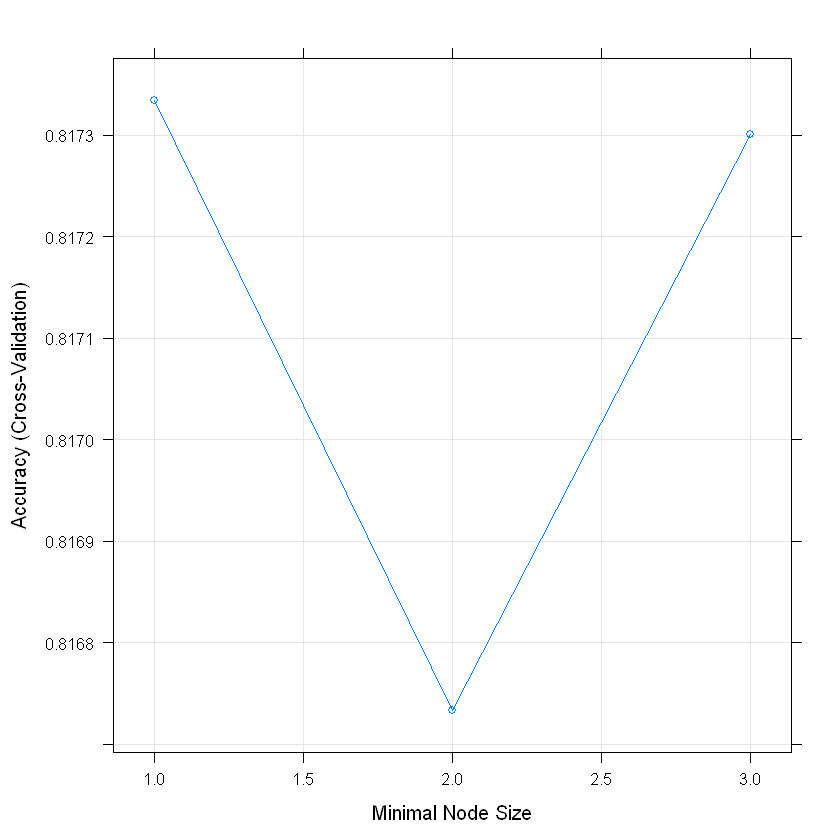

In [22]:
Grid10cr = expand.grid(mtry = 2, splitrule = c("gini"), min.node.size = c(1:3))
model10cr = train(default.payment.next.month~., cr1, method = "ranger", trControl = trainControl(method = "cv", number = 10, verboseIter = TRUE), tuneGrid = Grid10cr)
plot(model10cr)

### Random Forest 3

+ Fold1: mtry=4, splitrule=gini, min.node.size=1 
- Fold1: mtry=4, splitrule=gini, min.node.size=1 
+ Fold1: mtry=4, splitrule=gini, min.node.size=2 
- Fold1: mtry=4, splitrule=gini, min.node.size=2 
+ Fold1: mtry=4, splitrule=gini, min.node.size=3 
- Fold1: mtry=4, splitrule=gini, min.node.size=3 
+ Fold2: mtry=4, splitrule=gini, min.node.size=1 
- Fold2: mtry=4, splitrule=gini, min.node.size=1 
+ Fold2: mtry=4, splitrule=gini, min.node.size=2 
- Fold2: mtry=4, splitrule=gini, min.node.size=2 
+ Fold2: mtry=4, splitrule=gini, min.node.size=3 
- Fold2: mtry=4, splitrule=gini, min.node.size=3 
+ Fold3: mtry=4, splitrule=gini, min.node.size=1 
- Fold3: mtry=4, splitrule=gini, min.node.size=1 
+ Fold3: mtry=4, splitrule=gini, min.node.size=2 
- Fold3: mtry=4, splitrule=gini, min.node.size=2 
+ Fold3: mtry=4, splitrule=gini, min.node.size=3 
- Fold3: mtry=4, splitrule=gini, min.node.size=3 
+ Fold4: mtry=4, splitrule=gini, min.node.size=1 
- Fold4: mtry=4, splitrule=gini, min.node.size=1 


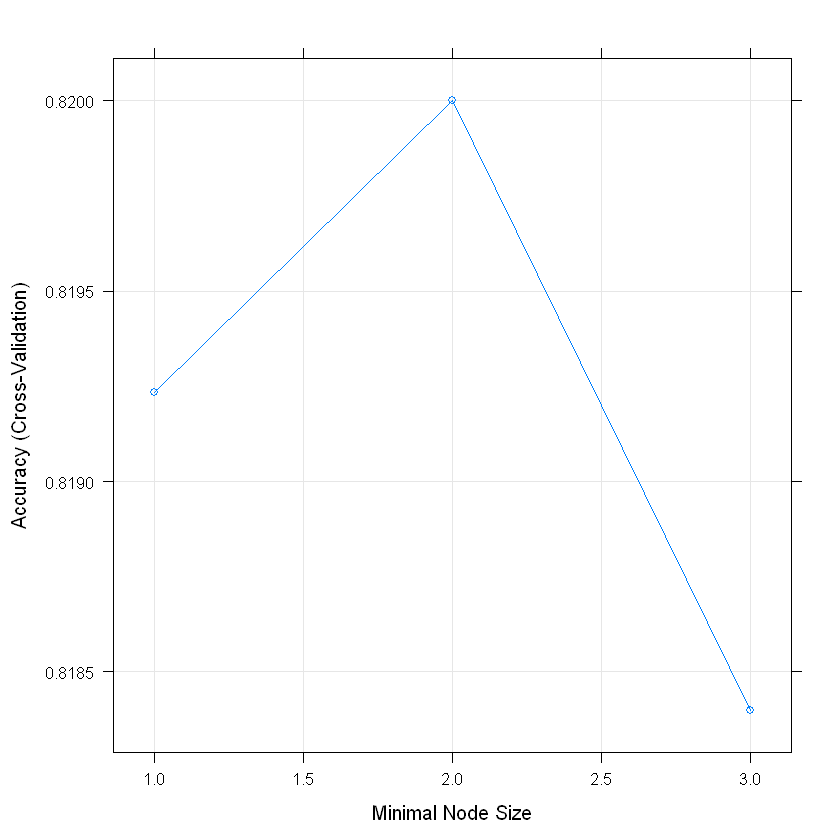

In [24]:
Grid10cr = expand.grid(mtry = 4, splitrule = c("gini"), min.node.size = c(1:3))
model10cr = train(default.payment.next.month~., cr1, method = "ranger", trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE), tuneGrid = Grid10cr)
plot(model10cr)

## Conclusion